## SHA Chatbot Development

## Introduction

The Social Health Authority (SHA) is central to Kenya’s ambitious initiative to achieve Universal Health Coverage (UHC), a goal driven by the need to ensure that every Kenyan can access quality, affordable healthcare without facing financial hardship. Established under the Social Health Insurance Act of 2023, SHA represents a transformative shift from the former National Hospital Insurance Fund (NHIF) framework. With this transition, SHA is tasked with managing multiple funds—including the Social Health Insurance Fund, Primary Health Care Fund, and Emergency, Chronic, and Critical Illness Fund—to address a broader spectrum of healthcare needs.

This comprehensive healthcare system overhaul reflects Kenya's commitment to reducing the economic burden of healthcare costs and improving health outcomes for all its citizens. However, the transition to SHA introduces a new structure for contributions, registration, and healthcare benefits, requiring citizens to navigate new processes. Moreover, SHA’s responsibilities extend beyond service provision, encompassing the management of financial resources, quality control, and equitable distribution of healthcare services across various demographics and regions.

As SHA rolls out these changes, many Kenyans have questions about how the new structure will impact them, from enrollment requirements to accessing different healthcare services. The authority’s extensive FAQ document aims to address these questions, covering topics such as registration processes, contributions, healthcare benefits, and the operational differences between SHA and NHIF. However, given the broad scope and complexity of the information, many people find it challenging to locate specific answers, leading to confusion and a high volume of inquiries to SHA's support teams. This underscores the need for an efficient, accessible support solution to help citizens understand and engage with SHA’s offerings effectively.

## Problem Statement

Despite SHA’s extensive FAQs, the complexity and breadth of information surrounding the SHA transition have left many people confused and in need of assistance. Individuals require guidance on various aspects, such as navigating the new registration process, understanding changes in benefits, determining eligibility for specialized funds, and more. This demand has led to a significant administrative burden on SHA’s support services. A chatbot can provide a scalable, efficient, and user-friendly solution, offering 24/7 assistance to answer questions in real-time and enhance user understanding, helping SHA deliver on its mission to facilitate seamless access to social health insurance information and services.

# Loading and cleaning data

In [1]:
import pandas as pd
import re

In [2]:
filepath = r'C:\Users\Catherine\Desktop\Project\capstone_project\data\FAQ_extracted.csv'
df = pd.read_csv(filepath)
df.head()

,Question,Answer
0,Why was the shift to Universal Health Coverage...,To ensure that all Kenyans have access to qual...
1,What is Social Health Insurance (SHI)?,It is a form of health financing mechanism bas...
2,What are the Principles of Social Health Insur...,"Accessible, quality, affordable healthcare ser..."
3,Why is Social Health Insurance important?,An efficient way of managing health funds – ab...
4,What are the 4 Health Laws?,1. The Social Health Insurance Law (2023) – Cr...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  93 non-null     object
 1   Answer    93 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


The dataset contains 93 questions and answers.

In [5]:
# check for missing values
df.isnull().sum()

Question    0
Answer      0
dtype: int64

There are no missing values

In [6]:
# check for duplicates
duplicates = df.duplicated().sum()
question_duplictaes = df['Question'].duplicated().sum()
answer_duplictaes = df['Answer'].duplicated().sum()


print(duplicates)
print(question_duplictaes)
print(answer_duplictaes)

0
0
3


The dataset contains 3 duplicate answers which might depend on the question asked and has no impact on the dataset.

In [7]:
# Standardizing text for consistency

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df['Question'] = df['Question'].apply(preprocess_text)
df['Answer'] = df['Answer'].apply(preprocess_text)

print(df.head())

                                            Question  \
0  why was the shift to universal health coverage...   
1                what is social health insurance shi   
2  what are the principles of social health insur...   
3           why is social health insurance important   
4                         what are the 4 health laws   

                                              Answer  
0  to ensure that all kenyans have access to qual...  
1  it is a form of health financing mechanism bas...  
2  accessible quality affordable healthcare servi...  
3  an efficient way of managing health funds  abl...  
4  1 the social health insurance law 2023  creati...  


In [8]:
# Stp word removal 
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['Questions'] = df['Question'].apply(lambda x: [word for word in x if word not in stop_words])

In [12]:
pip install wordcloud

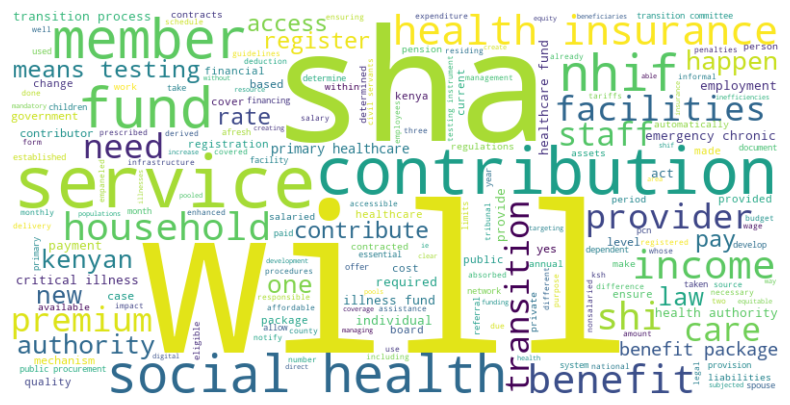

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the 'Question' and 'Answer' columns into a single text corpus
text_corpus = " ".join(df['Question'].fillna("") + " " + df['Answer'].fillna(""))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_corpus)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud provides a visual representation of the most frequently occurring words across the FAQ dataset. In a word cloud, the size of each word reflects its frequency or importance within the dataset: more frequently used words appear larger and more prominent, while less common words appear smaller.

word frequency bar chart

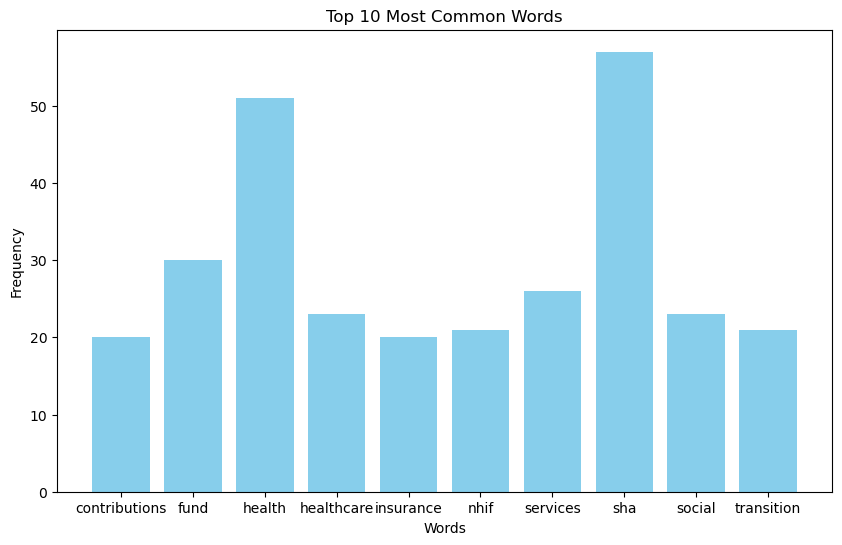

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Combine 'Question' and 'Answer' columns
text_corpus = " ".join(df['Question'].fillna("") + " " + df['Answer'].fillna(""))

# Create a CountVectorizer to get word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform([text_corpus])
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.toarray().flatten()))  

# Plot the word frequency bar chart
plt.figure(figsize=(10, 6))
plt.bar(word_freq.keys(), word_freq.values(), color='skyblue')
plt.title("Top 10 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


This bar chart offers a quick overview of the focus areas in the dataset, helping guide content improvements or highlight potential keywords for search optimization.

Most Common Words: The words with the highest bars appear most frequently in the dataset. These are likely the main topics or key themes of the FAQs, indicating what the FAQs focus on. For instance, in an FAQ about health insurance, terms like "coverage," "benefits," or "insurance" may dominate.

# Text length distribution

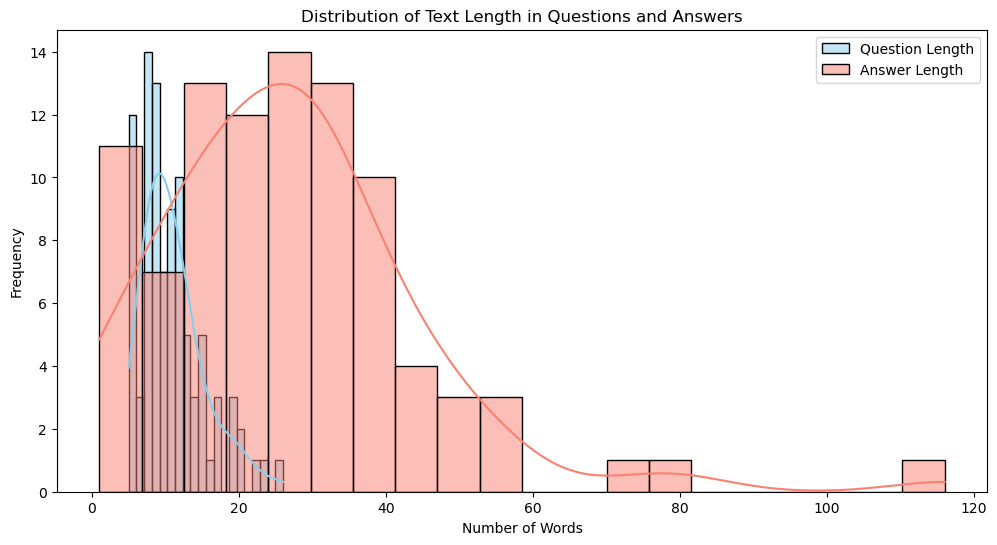

In [11]:
import seaborn as sns

# Calculate word counts for each Question and Answer
df['Question_Length'] = df['Question'].fillna("").apply(lambda x: len(x.split()))
df['Answer_Length'] = df['Answer'].fillna("").apply(lambda x: len(x.split()))

# Plot histogram for text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Question_Length'], bins=20, color='skyblue', label='Question Length', kde=True)
sns.histplot(df['Answer_Length'], bins=20, color='salmon', label='Answer Length', kde=True)
plt.title("Distribution of Text Length in Questions and Answers")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()


The text length distribution histogram provides insights into the length (in terms of word count) of each question and answer in the FAQ dataset. By analyzing this, we can understand how detailed or concise the FAQs are, which can help improve the content's readability and accessibility.

Peak/Mode: The highest point on the histogram indicates the most common length of questions and answers. For example, if the peak is around 10 words, most questions or answers are around this length.

Spread/Distribution: A narrow distribution suggests that most questions and answers are similar in length, creating a consistent FAQ style. A wider distribution indicates variability, where some responses might be very short and others quite long.

Comparing Questions and Answers: By comparing both histograms, we can see if questions are generally shorter than answers (which is typical in FAQs) or if there's any inconsistency.

# Natural Language Understanding


- intent: greet
  examples: |
    - hey
    - hello
    - hi
    - hello there
    - good morning
    - good evening
    - moin
    - hey there
    - let's go
    - hey dude
    - goodmorning
    - goodevening
    - good afternoon

- intent: goodbye
  examples: |
    - see you
    - catch you later
    - bye for now
    - farewell
    - talk to you soon

- intent: general_inquiry
  examples: |
    - what is sha all about
    - what does the social health authority do
    - who manages sha
    - can you tell me more about sha
    - what is the role of sha in healthcare
    - what does sha stand for
    - explain tthe purpose of sha
    - why was sha established
    - how does sha work

- intent: registration
  examples: |
    - How do I become a member of SHA?
    - Is registration with SHA mandatory?
    - Can I register my dependents with SHA?
    - What documents do I need to register with SHA?
    - How do I sign up for SHA benefits?
    - Is registration open for all residents?
    - Can foreigners register for SHA?
    - What is the process for SHA registration?
    - Do I need to register separately if I was with NHIF before?

# Domain.yml

intents:
  - greet
  - goodbye
  - general_inquiry
  - registration
  - contributions
  - transition
  

responses:
  utter_greet:
  - text: "Hey! How are you?"

  utter_goobye:
  - text: "Goodbye! Feel free to ask more questions anytime."

  utter_general_inquiry:
  - text: "SHA, or Social Health Authority, was established to manage healthcare funds in Kenya. Its goal is to ensure all Kenyans have access to quality, affordable, and comprehensive healthcare services, from health promotion to treatment, rehabilitation, and palliative care. "
  - text: "The Social Health Authority (SHA) is a central body responsible for managing healthcare funds in Kenya. It oversees various healthcare programs, ensuring efficient and equitable access to medical services for all Kenyans."
  - text: "SHA stands for Social Health Authority. It was created to streamline healthcare financing in Kenya, aiming to provide accessible and affordable healthcare services to every Kenyan through efficient management of health funds."

  utter_ask_about_registration:
  - text: "To become a member of SHA, you need to complete a registration form using your national ID or any valid identification document. Registration is mandatory for all Kenyans."
  - text: "Yes, SHA registration is mandatory for all residents of Kenya. Even if you were a previous NHIF member, you must register again under SHA."
  - text: "You can register your dependents, and there is no limit to the number of dependents you can include, as long as they are declared during registration."
  - text: "To register for SHA, you'll need to provide your national ID and details for any dependents you wish to include. The process is straightforward and open to all residents, including foreigners who meet the residency requirements."
  - text: "SHA registration is open to all residents of Kenya, including foreigners who have been residing in the country for more than 12 months. Once registered, you'll have access to SHA benefits."
  - text: "If you were with NHIF before, you must still register afresh with SHA. The registration ensures that your details are updated under the new system."


Workflow Diagram:

[User Input]

      |

[NLU: Intent & Entity Recognition]

      |

[Dialogue Management (Rasa Core)]

      |

[FAQ Database Retrieval]

      |

[Response Generation]

      |

[User Feedback (Optional)]

      |
      
[End or Follow-up]



# Explanation of workflow diagram

1. User input:

Action: User types a question into the chatbot interface e.g Why is NHIF transitioning to SHA?


2. Rasa NLU(Natural Language Understanding):

Action: The chatbot processes the input to identify the intent, (e.g transition) and entities (e.g transition_detail)

3. Rasa core (Dialogue management):

Action: Based on the recognized intent, the chatbot decides on the appropriate response and content for the conversation

4. FAQ Database Retrival:

Action: Based on the recognized intent, the chatbot decides on the appropriate response and contect for the conversation.

5. Response Generation:

Action: The chatbot retrieves relevant information from the FAQ database(e.g The transition from NHIF to SHA was necessitated to create a more efficient and equitable healthcare system for all Kenyans. SHA aims to address inefficiencies and improve healthcare service delivery.)

6. User Feedback

Action: After the responses, the chatbot asks for feedback(e.g was this helpful?) which will help to improve the bot.

7. End interaction or follow up:

Action: The user either ends the interaction or asks another folowup question. The bot continues to process new inputs and provide answers.

